# Spatial filtering

### `IMREAD_REDUCED_GRAYSCALE_2` If set, always convert image to the single channel grayscale image and the image size reduced 1/2.

## 1. Averaging filter : kernel sum to 1



(512, 384)
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00

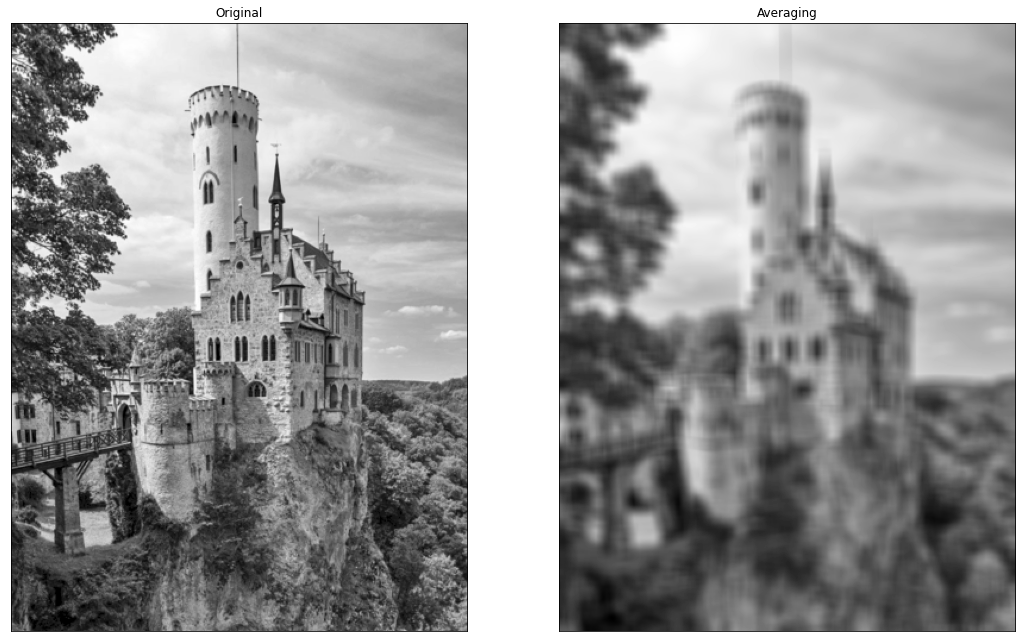

In [41]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# original img size 768*1024
img = cv.imread('castle.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Image size is reduced
print(img.shape)

# Averaging
dimension = 11
kernel = np.ones((dimension,dimension),np.float32)/(dimension**2)

# Averaging kernel sum = 1
print( kernel, sum(sum(kernel)))


imgc = cv.filter2D(img,-1,kernel)
# -1 is the desired depth of the img

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

## 2. Sobel filters

### A gradient operator to detect edges : kernal sums to 0

1. central differnce in vertical---> sobel vertical kernel --> detect horizontal edges

2. central differnce in horizontal---> sobel horizontal kernel --> detect vertical edges

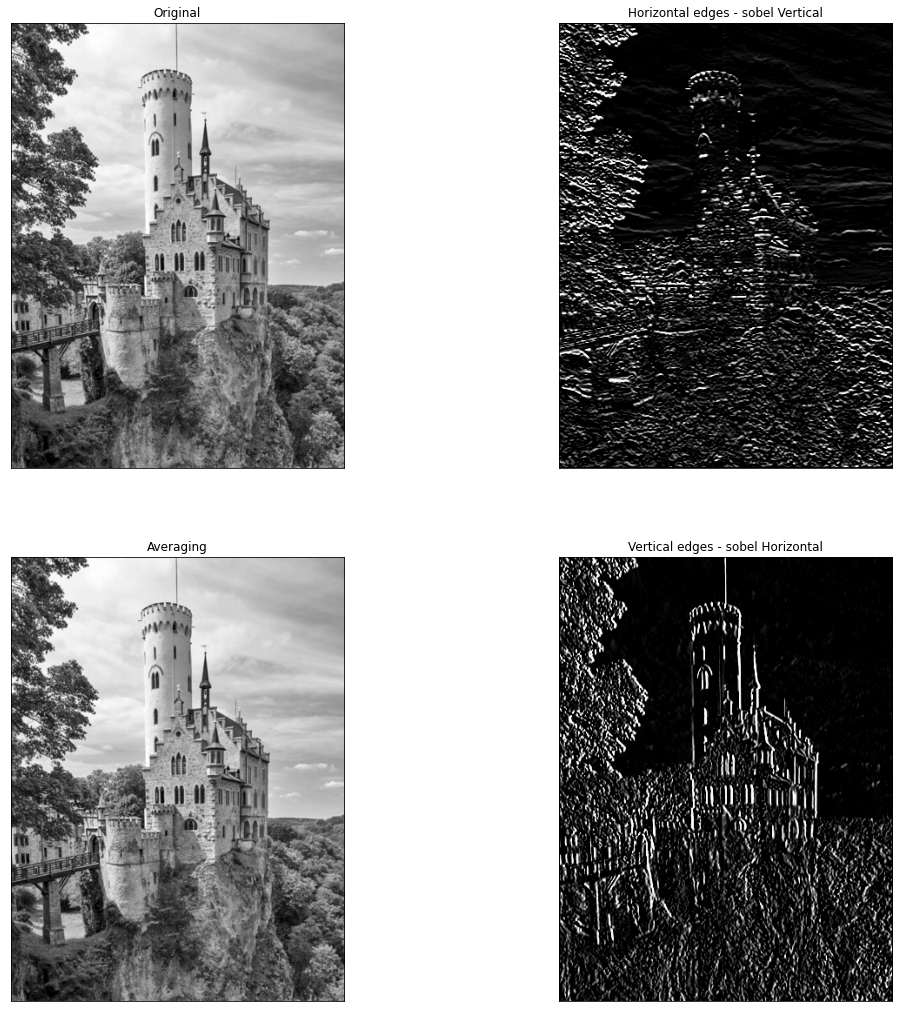

In [36]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('castle.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

sobel_vertical_kernel = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float') #central differnce in vertical---> sobel vertical kernel
sobel_horizontal_kernel = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype='float') #central differnce in horizontal---> sobel horizontal kernel



img_hor_edges = cv.filter2D(img,-1,sobel_vertical_kernel)
img_ver_edges = cv.filter2D(img,-1,sobel_horizontal_kernel)
# -1 is the desired depth of the img


fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(18,18))
axes[0][0].imshow(img, cmap='gray')
axes[0][0].set_title('Original')
axes[0][0].set_xticks([]), axes[0][0].set_yticks([])

axes[0][1].imshow(img_hor_edges, cmap='gray')
axes[0][1].set_title('Horizontal edges - sobel Vertical')
axes[0][1].set_xticks([]), axes[0][1].set_yticks([])

axes[1][0].imshow(img, cmap='gray')
axes[1][0].set_title('Averaging')
axes[1][0].set_xticks([]), axes[1][0].set_yticks([])

axes[1][1].imshow(img_ver_edges, cmap='gray')
axes[1][1].set_title('Vertical edges - sobel Horizontal')
axes[1][1].set_xticks([]), axes[1][1].set_yticks([])

plt.show()

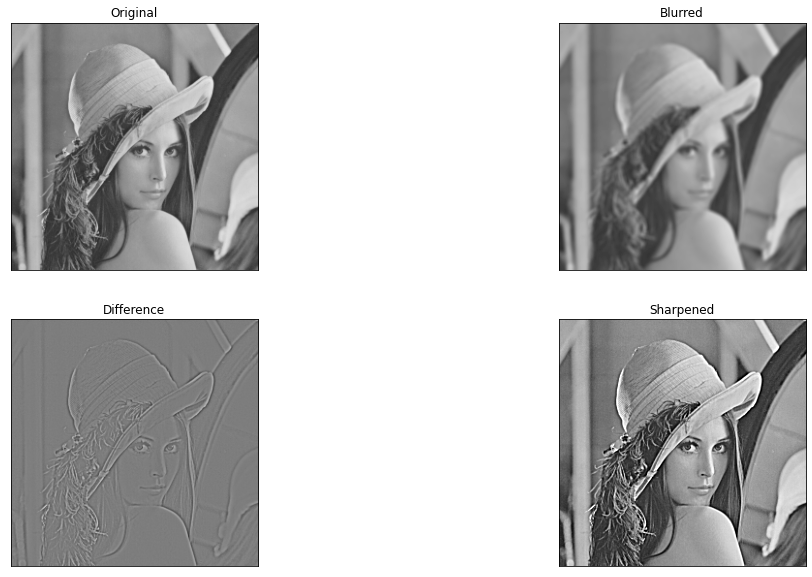

In [6]:
# Sharpening
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt


img = cv.imread('Lenna.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

sigma = 2
kernel = cv.getGaussianKernel(5, sigma)
blurred = cv.sepFilter2D(img, -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)
diff = img.astype('float32') - blurred.astype('float32')

sharpened = cv.addWeighted(img.astype('float32') , 1.0, diff, 1.5, 0)

fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(18,10))
axes[0,0].imshow(img, cmap='gray', vmin = 0, vmax = 255)
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,1].imshow(blurred, cmap='gray', vmin = 0, vmax = 255)
axes[0,1].set_title('Blurred')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])
axes[1,0].imshow(diff + 125, cmap='gray', vmin = 0, vmax = 255)
axes[1,0].set_title('Difference')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,1].imshow(sharpened, cmap='gray', vmin = 0, vmax = 255)
axes[1,1].set_title('Sharpened')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])
plt.show()

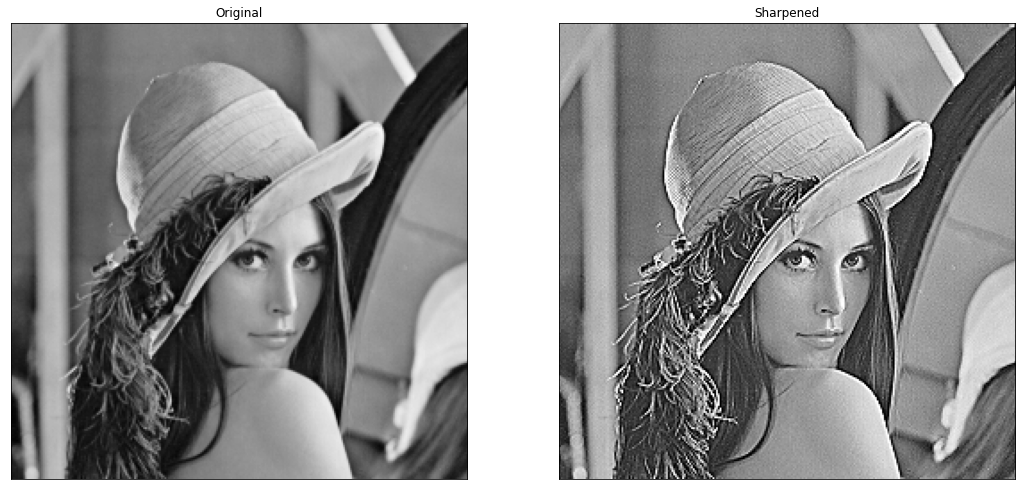

In [7]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('Lenna.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

kernel = np.array([(0, -1, 0), (-1, 5, -1), (0, -1, 0)], dtype='float')
img_sharp = cv.filter2D(img,-1,kernel)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray', vmin = 0, vmax = 255)
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(img_sharp, cmap='gray', vmin = 0, vmax = 255)
axes[1].set_title('Sharpened')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()